In [5]:
%matplotlib inline
import ogr
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

In [10]:
sfile = 'LME66/LMEs66.shp'
ds = ogr.Open(sfile)


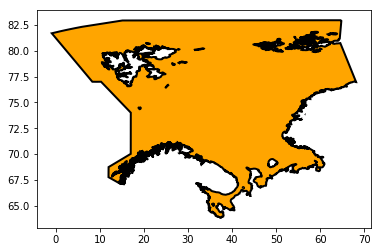

In [13]:
lyr = ds.GetLayer(0)
ft = lyr.GetFeature(53)
geom = ft.GetGeometryRef()

codes = []
all_x = []
all_y = []

if (geom.GetGeometryType() == ogr.wkbPolygon):
  for i in range(geom.GetGeometryCount()):

    r = geom.GetGeometryRef(i)
    x = [r.GetX(j) for j in range(r.GetPointCount())]
    y = [r.GetY(j) for j in range(r.GetPointCount())]

    codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
    all_x += x
    all_y += y

if (geom.GetGeometryType() == ogr.wkbMultiPolygon):
  codes = []
  for i in range(geom.GetGeometryCount()):
    # Read ring geometry and create path
    r = geom.GetGeometryRef(i)
    for part in r:
      x = [part.GetX(j) for j in range(part.GetPointCount())]
      y = [part.GetY(j) for j in range(part.GetPointCount())]
      # skip boundary between individual rings
      codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
      all_x += x
      all_y += y

carib_path = mpath.Path(np.column_stack((all_x,all_y)), codes)    
carib_patch = patches.PathPatch(carib_path, facecolor='orange', lw=2)

#poly1 = patches.Polygon([[-80,20],[-75,20],[-75,15],[-80,15],[-80,20]], zorder=5, fc='none', lw=3)
#poly2 = patches.Polygon([[-65,25],[-60,25],[-60,20],[-65,20],[-65,25]], zorder=5, fc='none', lw=3)


fig, ax = plt.subplots(1,1)

ax.add_patch(carib_patch)
ax.autoscale_view()

In [ ]:
for poly in [poly1, poly2]:
    if carib_path.intersects_path(poly.get_path()):
        poly.set_edgecolor('g')
    else:
        poly.set_edgecolor('r')

    ax.add_patch(poly)